**1. Importing Libraries**

In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


**2. Loading and Understanding the data file**

In [2]:
Nutri_data = pd.read_csv('C:/GUVI/Projects/05_Food_Classification/synthetic_food_dataset_imbalanced.csv')
print("No of Rows and Columns In a Dataset:",Nutri_data.shape)

No of Rows and Columns In a Dataset: (31700, 16)


In [3]:
Nutri_data.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [4]:
Nutri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           31700 non-null  object 
dtypes: b

In [5]:
Nutri_data.describe()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size
count,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000,31325.000000
mean,273.378441,9.523802,12.476848,28.943200,8.543813,1.904044,335.387611,26.865167,64.213509,48.976592,150.731940
std,111.457160,8.024212,8.425834,12.668795,7.989075,1.779542,319.066106,24.965067,25.390239,20.738749,51.796599
min,60.786204,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.465039,58.575705
25%,210.301731,3.858307,8.245636,25.098800,3.739656,0.741204,63.000654,12.701920,59.984731,38.994221,109.511113
50%,281.774249,9.091637,11.574161,29.681430,5.500479,1.646608,292.525242,23.285882,68.436204,45.613748,151.706514
75%,329.821946,12.683957,15.818611,34.635789,14.426303,2.668750,631.367901,35.132214,75.464697,52.399496,189.083806
max,1289.956763,81.761772,88.619611,140.585537,78.548162,18.891993,2724.236846,260.149443,286.126400,251.837472,554.719629


**Insights:**

1. Nutritional dataset has **31700 rows & 16 columns**.
2. Data includes various nutrition category like 
    - protein, fat etc... in **numeric** datatype
    - meal type, preparation method,food name in **string** datatype
    - Is vegan and Is Gluten Free in **bool** datatype.
3. No of records are not same across the features, it denotes there are **NULL** values in the numeric columns.
4. Statistical information of numerical features shows below info:
    - Mean > 50% median for Protein,fat,Sugar,Fiber,Sodium,Cholesterol,Water_Content. Hence, data should be right skewed. 
    - Mean < 50% Median for Calories,Carbs,Glycemic_Index,Serving_Size. Hence, data must be left skewed here.
    - Mean != Median but their difference is not much high numbers for Protein,Carbs,Serving_Size. Hence, data must be a balanced/symmetric distribution.


**3. Data Visualization**

Creating various plots to understand the original data distribution

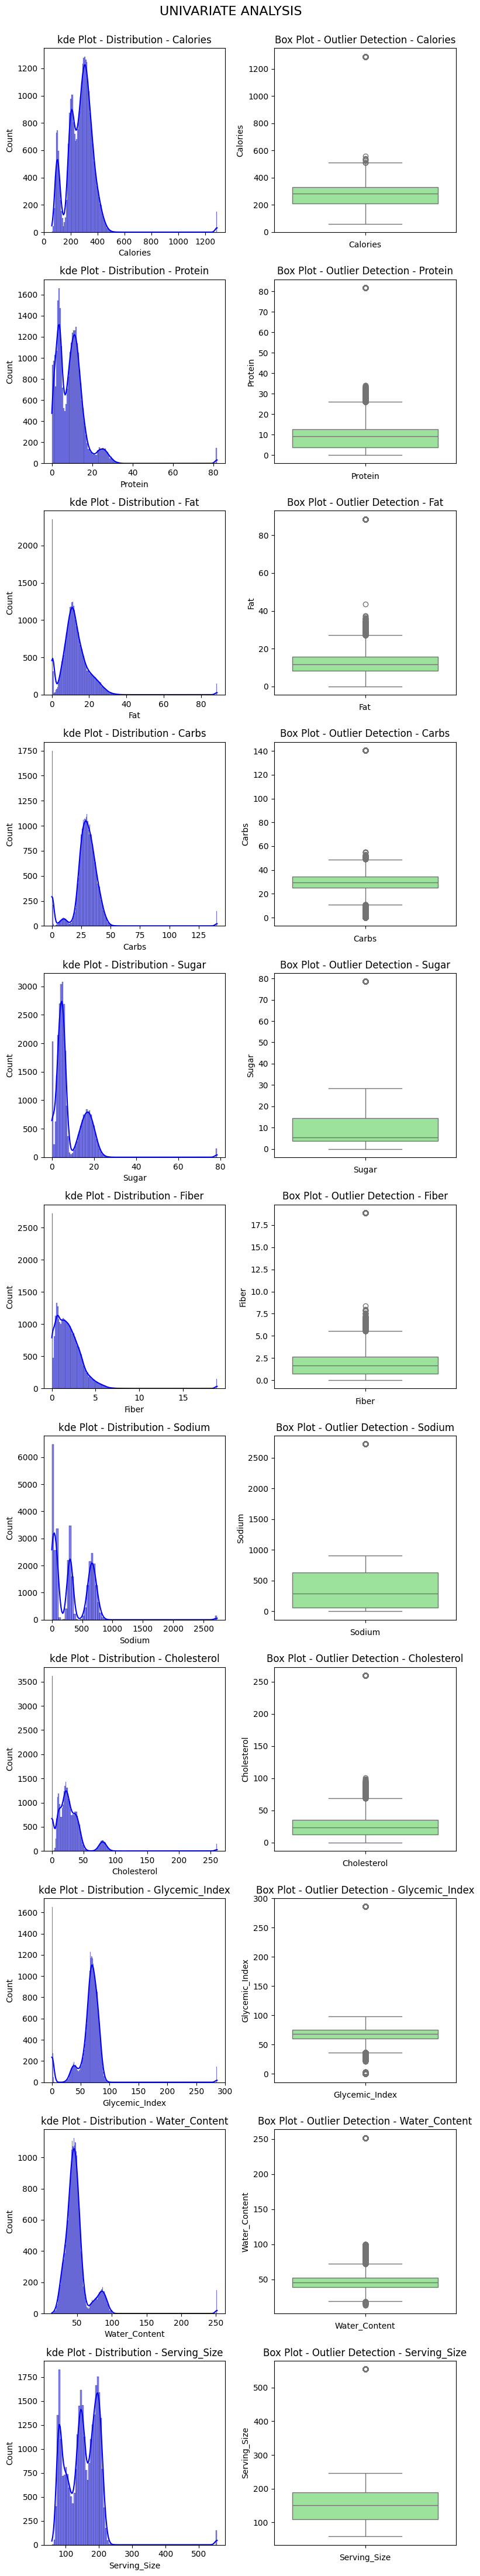

In [6]:
cont_cols = Nutri_data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(cont_cols),ncols=2,figsize=(8,4*len(cont_cols)))
fig.suptitle("UNIVARIATE ANALYSIS",fontsize=16,y=1)

for i, col in enumerate(cont_cols):
    #Histogram plot - To check the data distribution - Left side
    sns.histplot(Nutri_data[col],ax=axes[i,0],kde=True,color='blue') 
    axes[i,0].set_title(f'kde Plot - Distribution - {col}')
    axes[i,0].set_xlabel(col)

    #Box plot - To check the data distribution - Left side
    sns.boxplot(y=Nutri_data[col],ax=axes[i,1],color='lightgreen',orient='v') 
    axes[i,1].set_title(f'Box Plot - Outlier Detection - {col}')
    axes[i,1].set_xlabel(col)

plt.tight_layout()
plt.show()

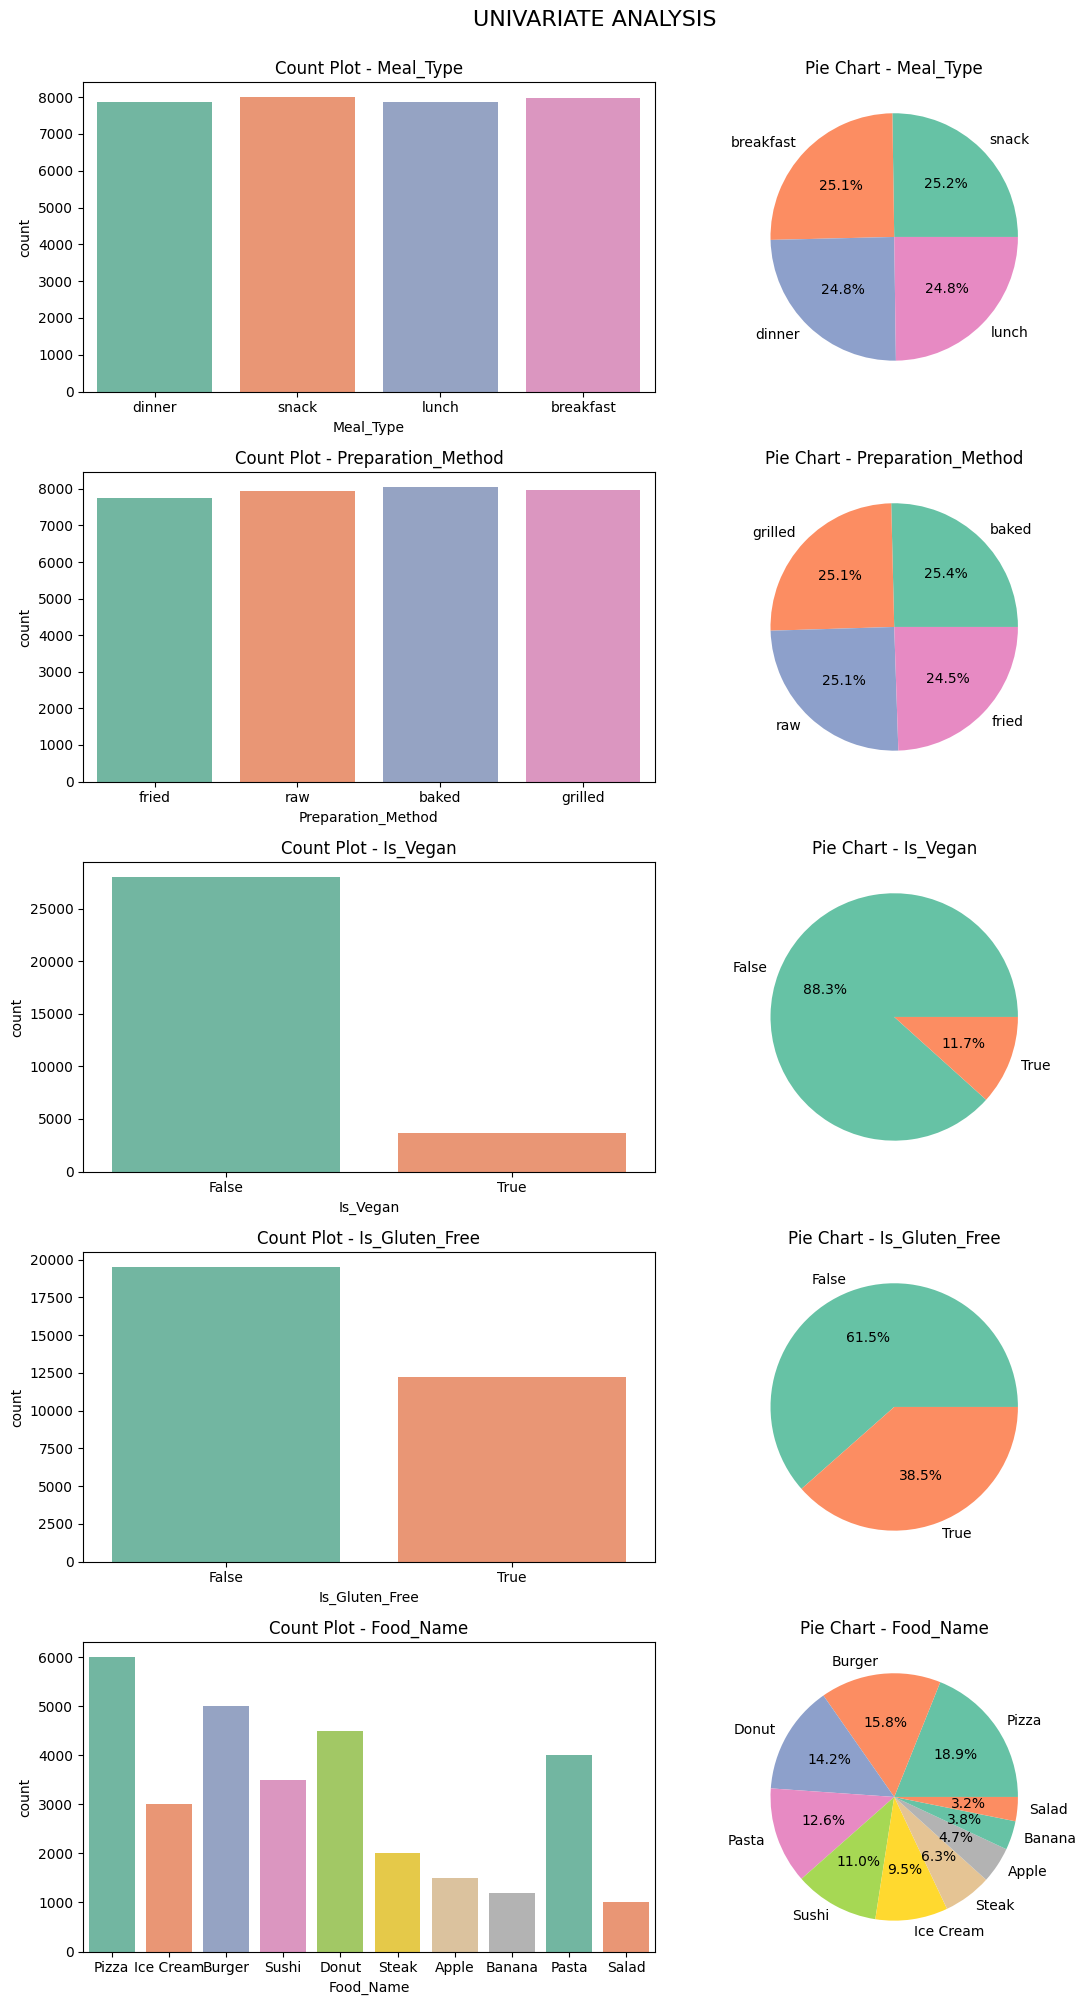

In [7]:
cat_cols = ['Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free', 'Food_Name']

fig, axes = plt.subplots(nrows=len(cat_cols),ncols=2,figsize=(12,4*len(cat_cols)))
fig.suptitle("UNIVARIATE ANALYSIS",fontsize=16,y=1)

for i, col in enumerate(cat_cols):
    #Histogram plot - To check the data distribution - Left side
    sns.countplot(x=col,hue=col,data=Nutri_data,ax=axes[i,0],palette='Set2',legend=False) 
    axes[i,0].set_title(f'Count Plot - {col}')
    axes[i,0].set_xlabel(col)

    #Box plot - To check the data distribution - Left side
    counts=Nutri_data[col].value_counts()
    axes[i,1].pie(counts, labels=counts.index,autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    axes[i,1].set_title(f'Pie Chart - {col}')

plt.tight_layout()
plt.show()


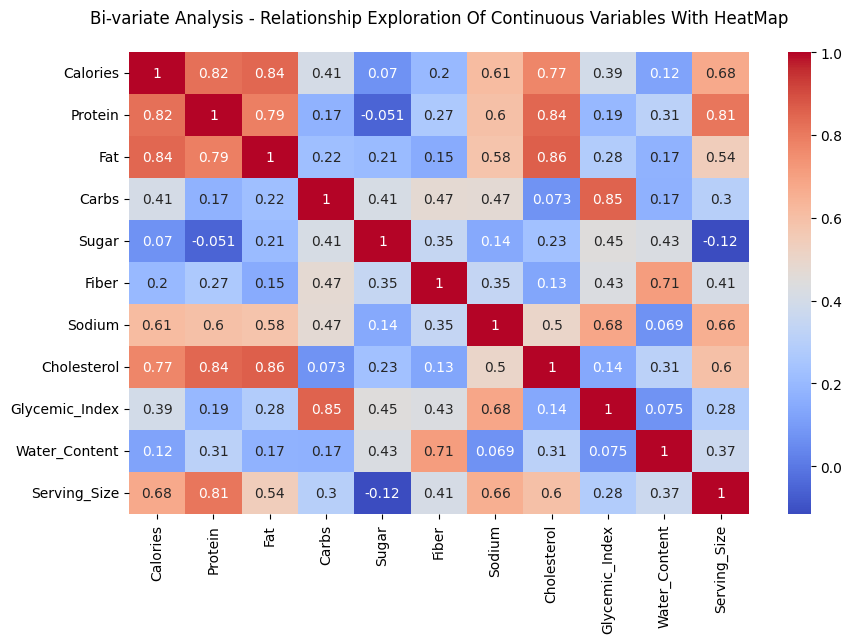

In [8]:
#Heat Map For Numeric Columns
plt.figure(figsize=(10,6))
sns.heatmap(Nutri_data[cont_cols].corr(),cmap='coolwarm',annot=True)
plt.title("Bi-variate Analysis - Relationship Exploration Of Continuous Variables With HeatMap\n")
plt.show()

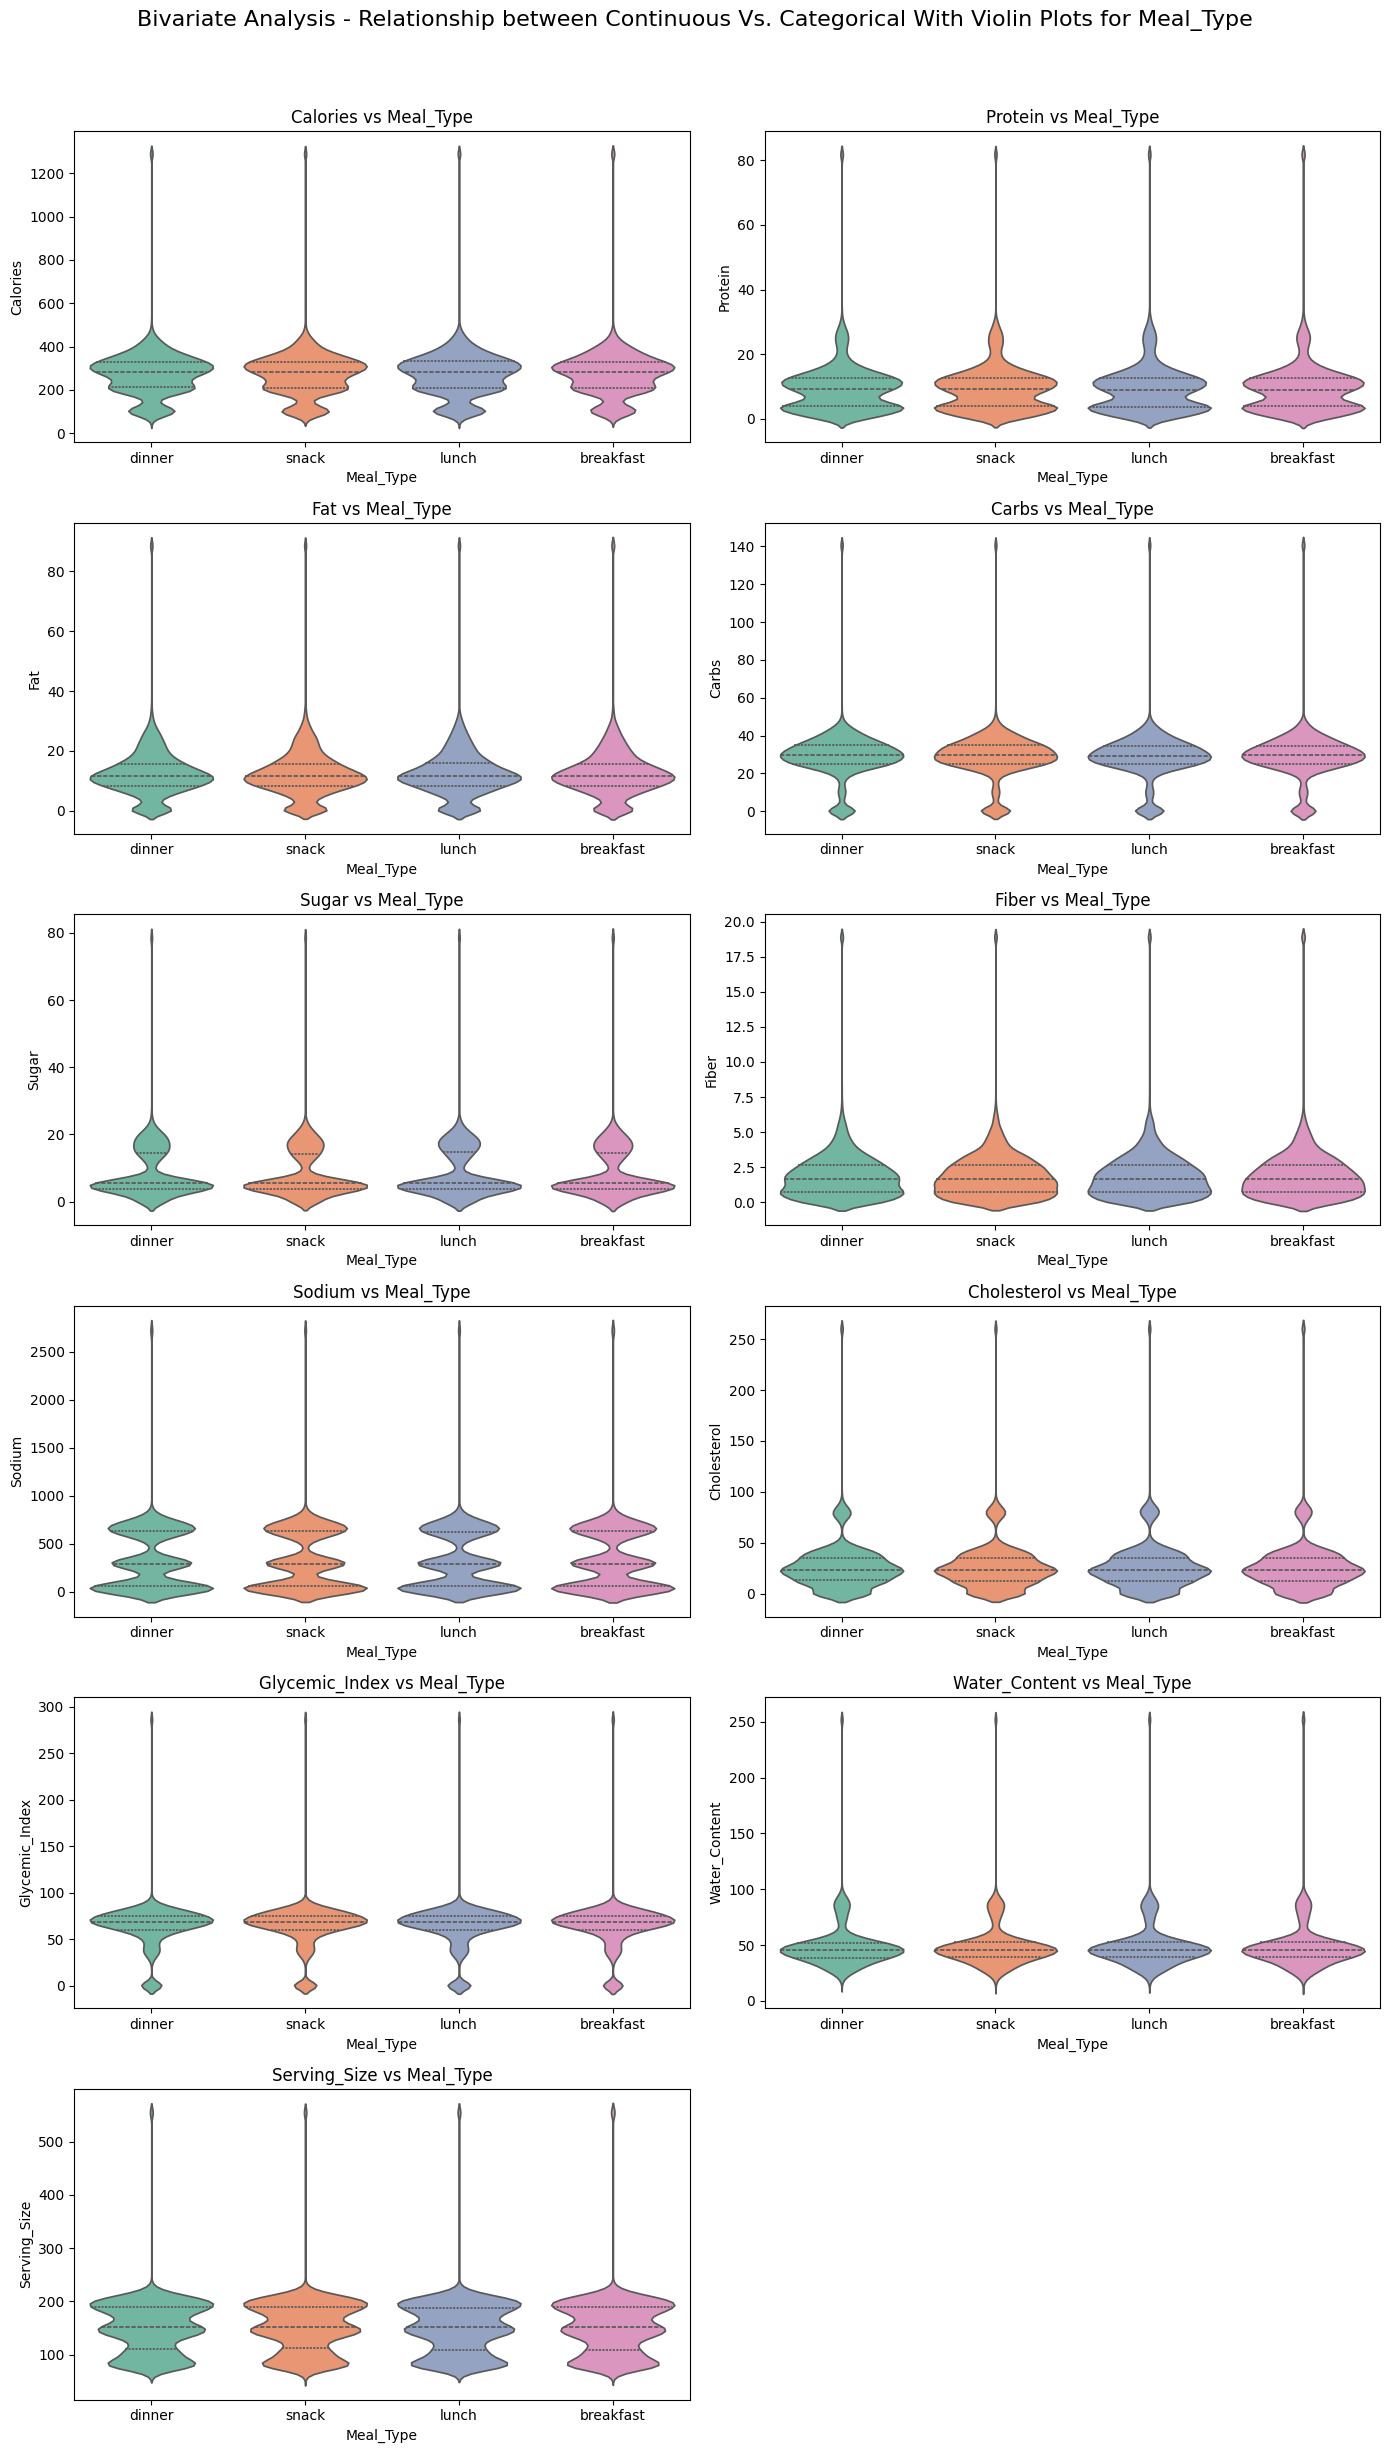

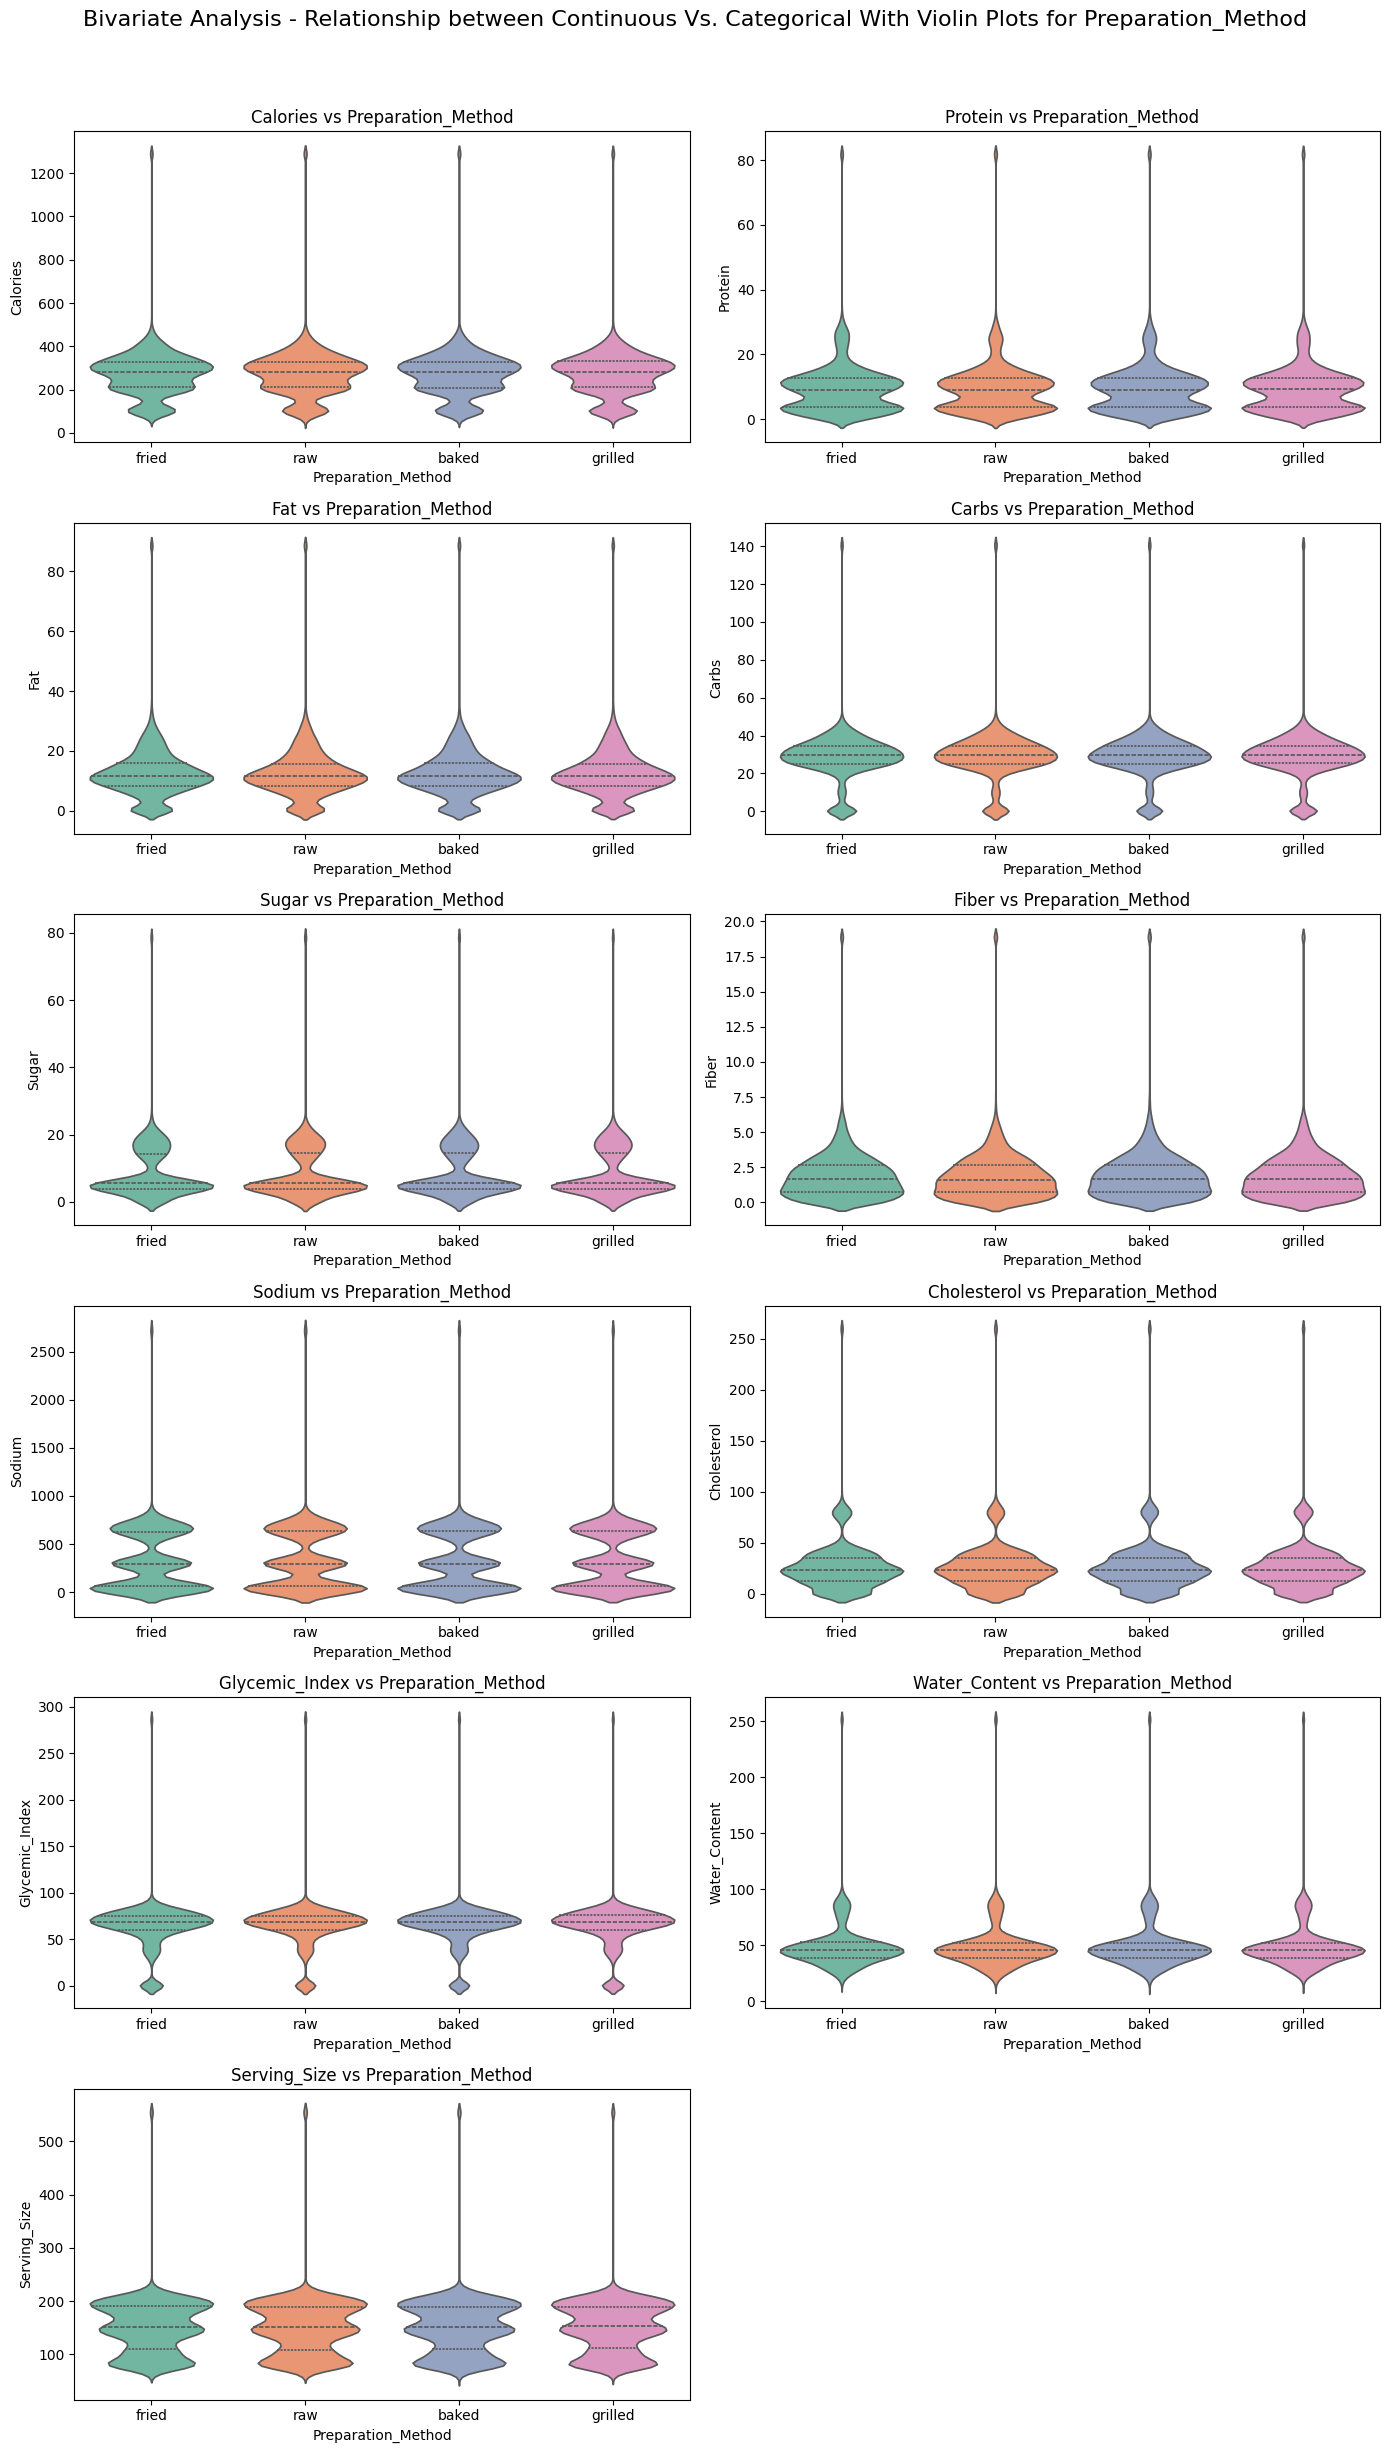

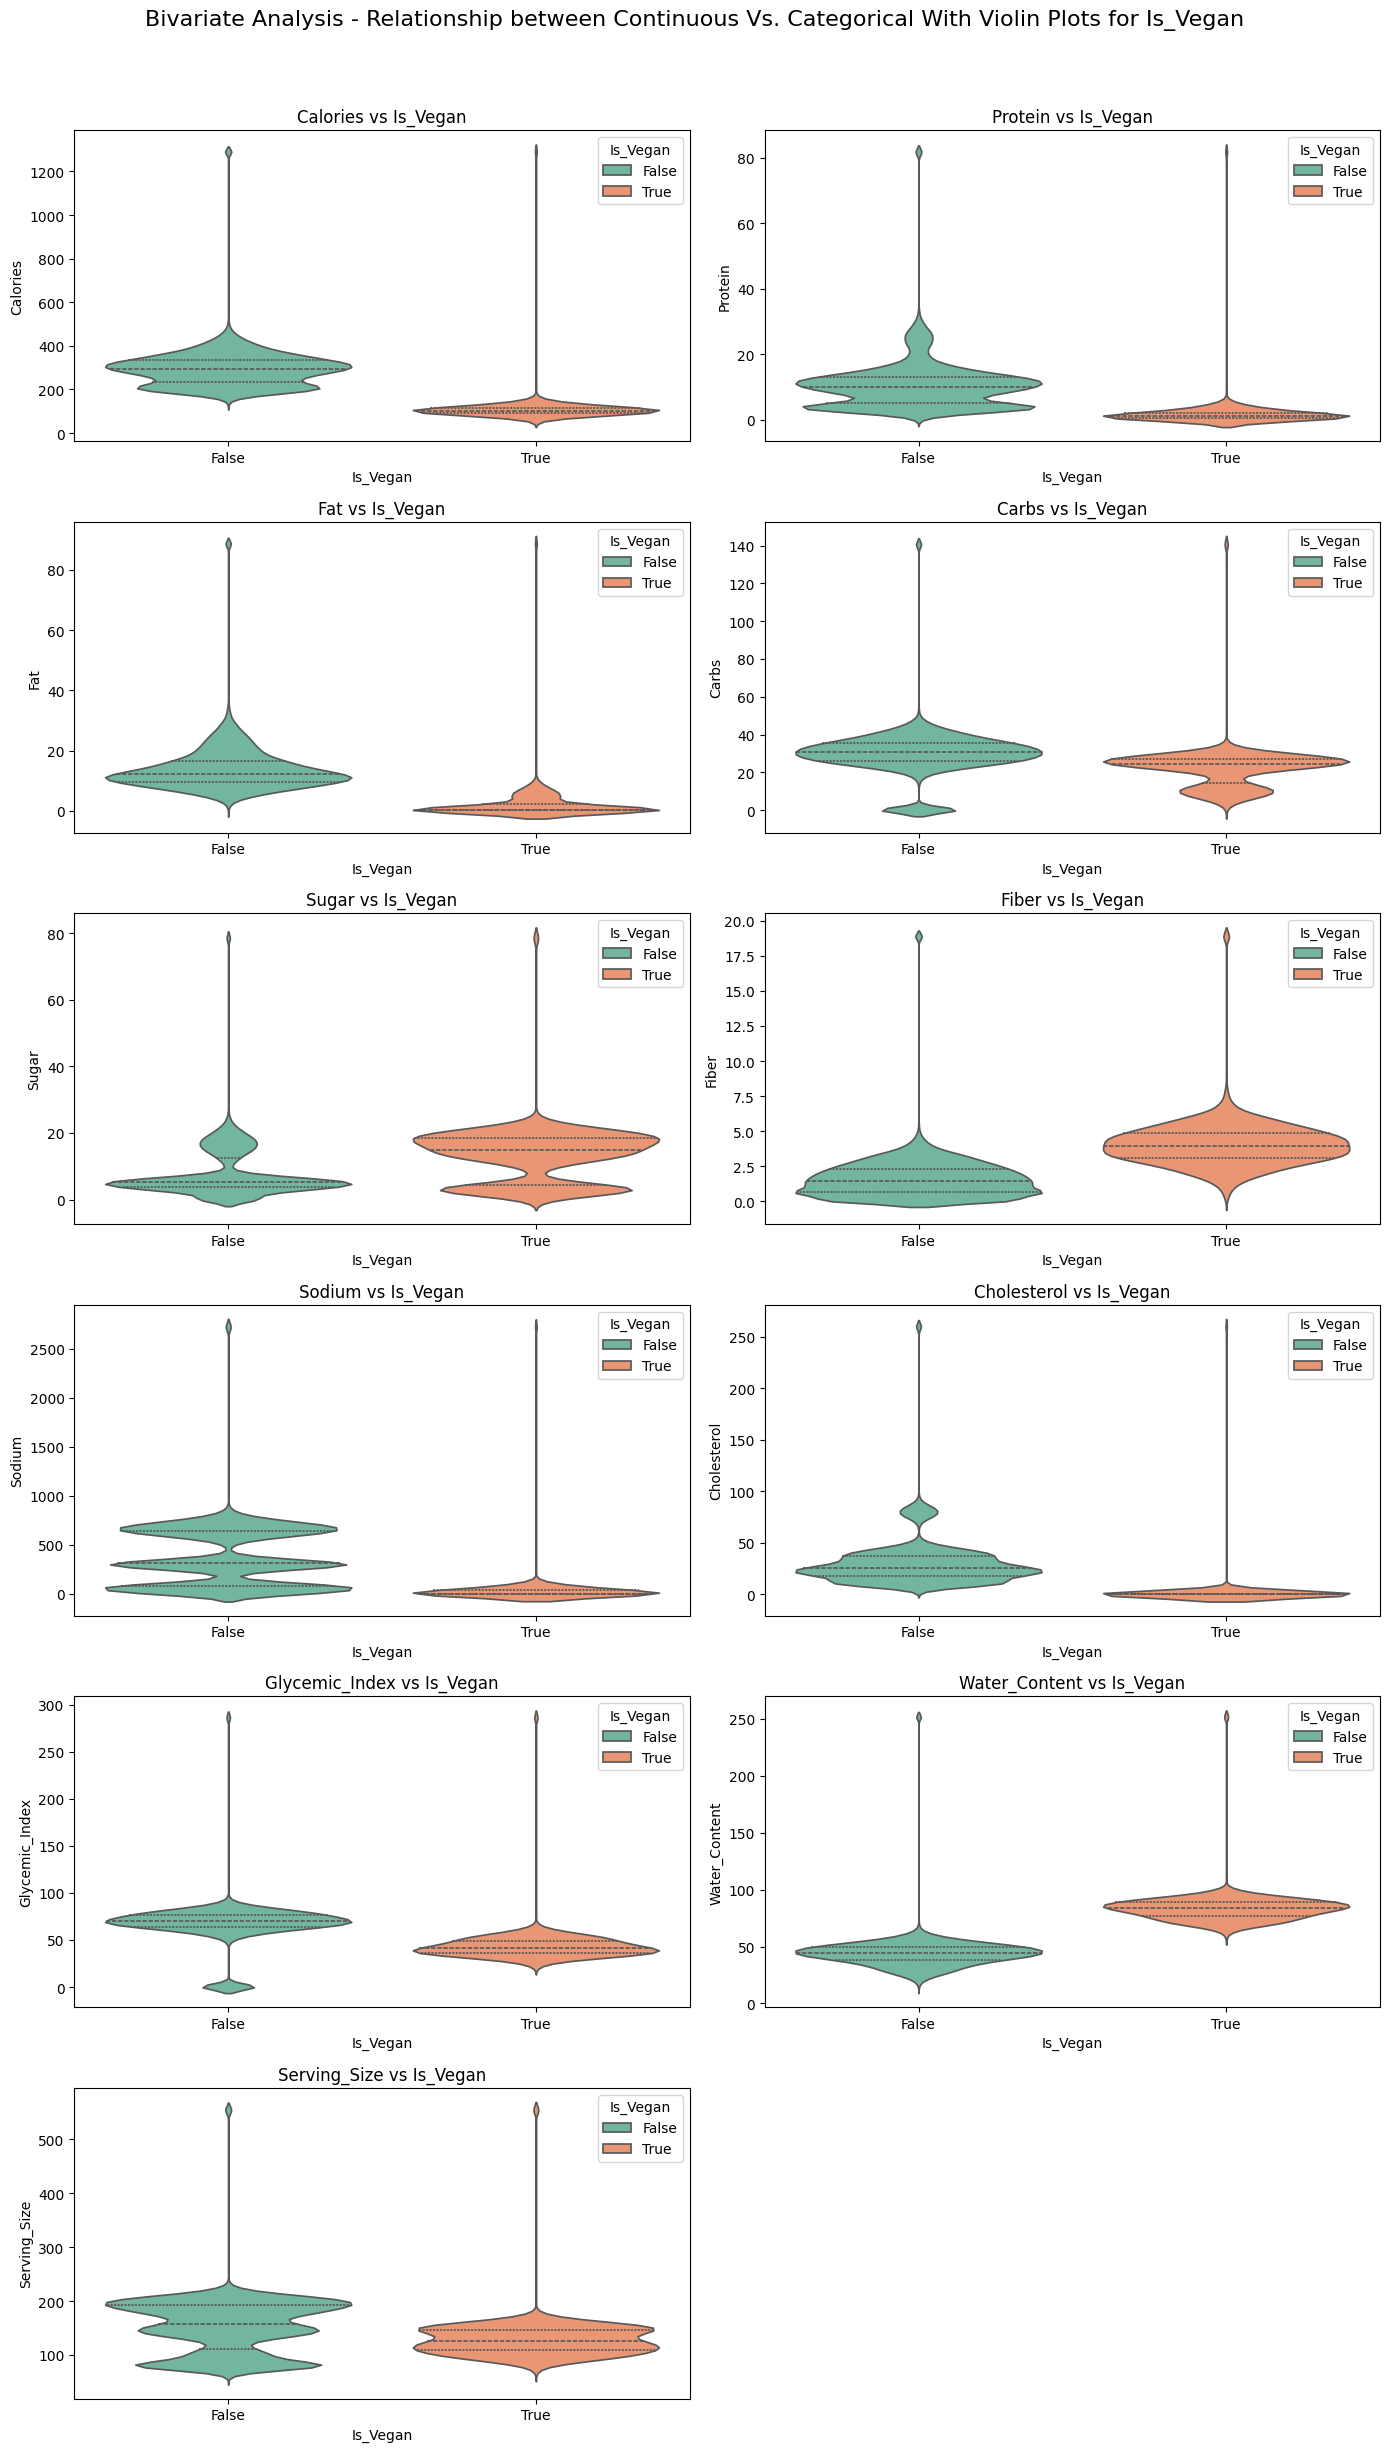

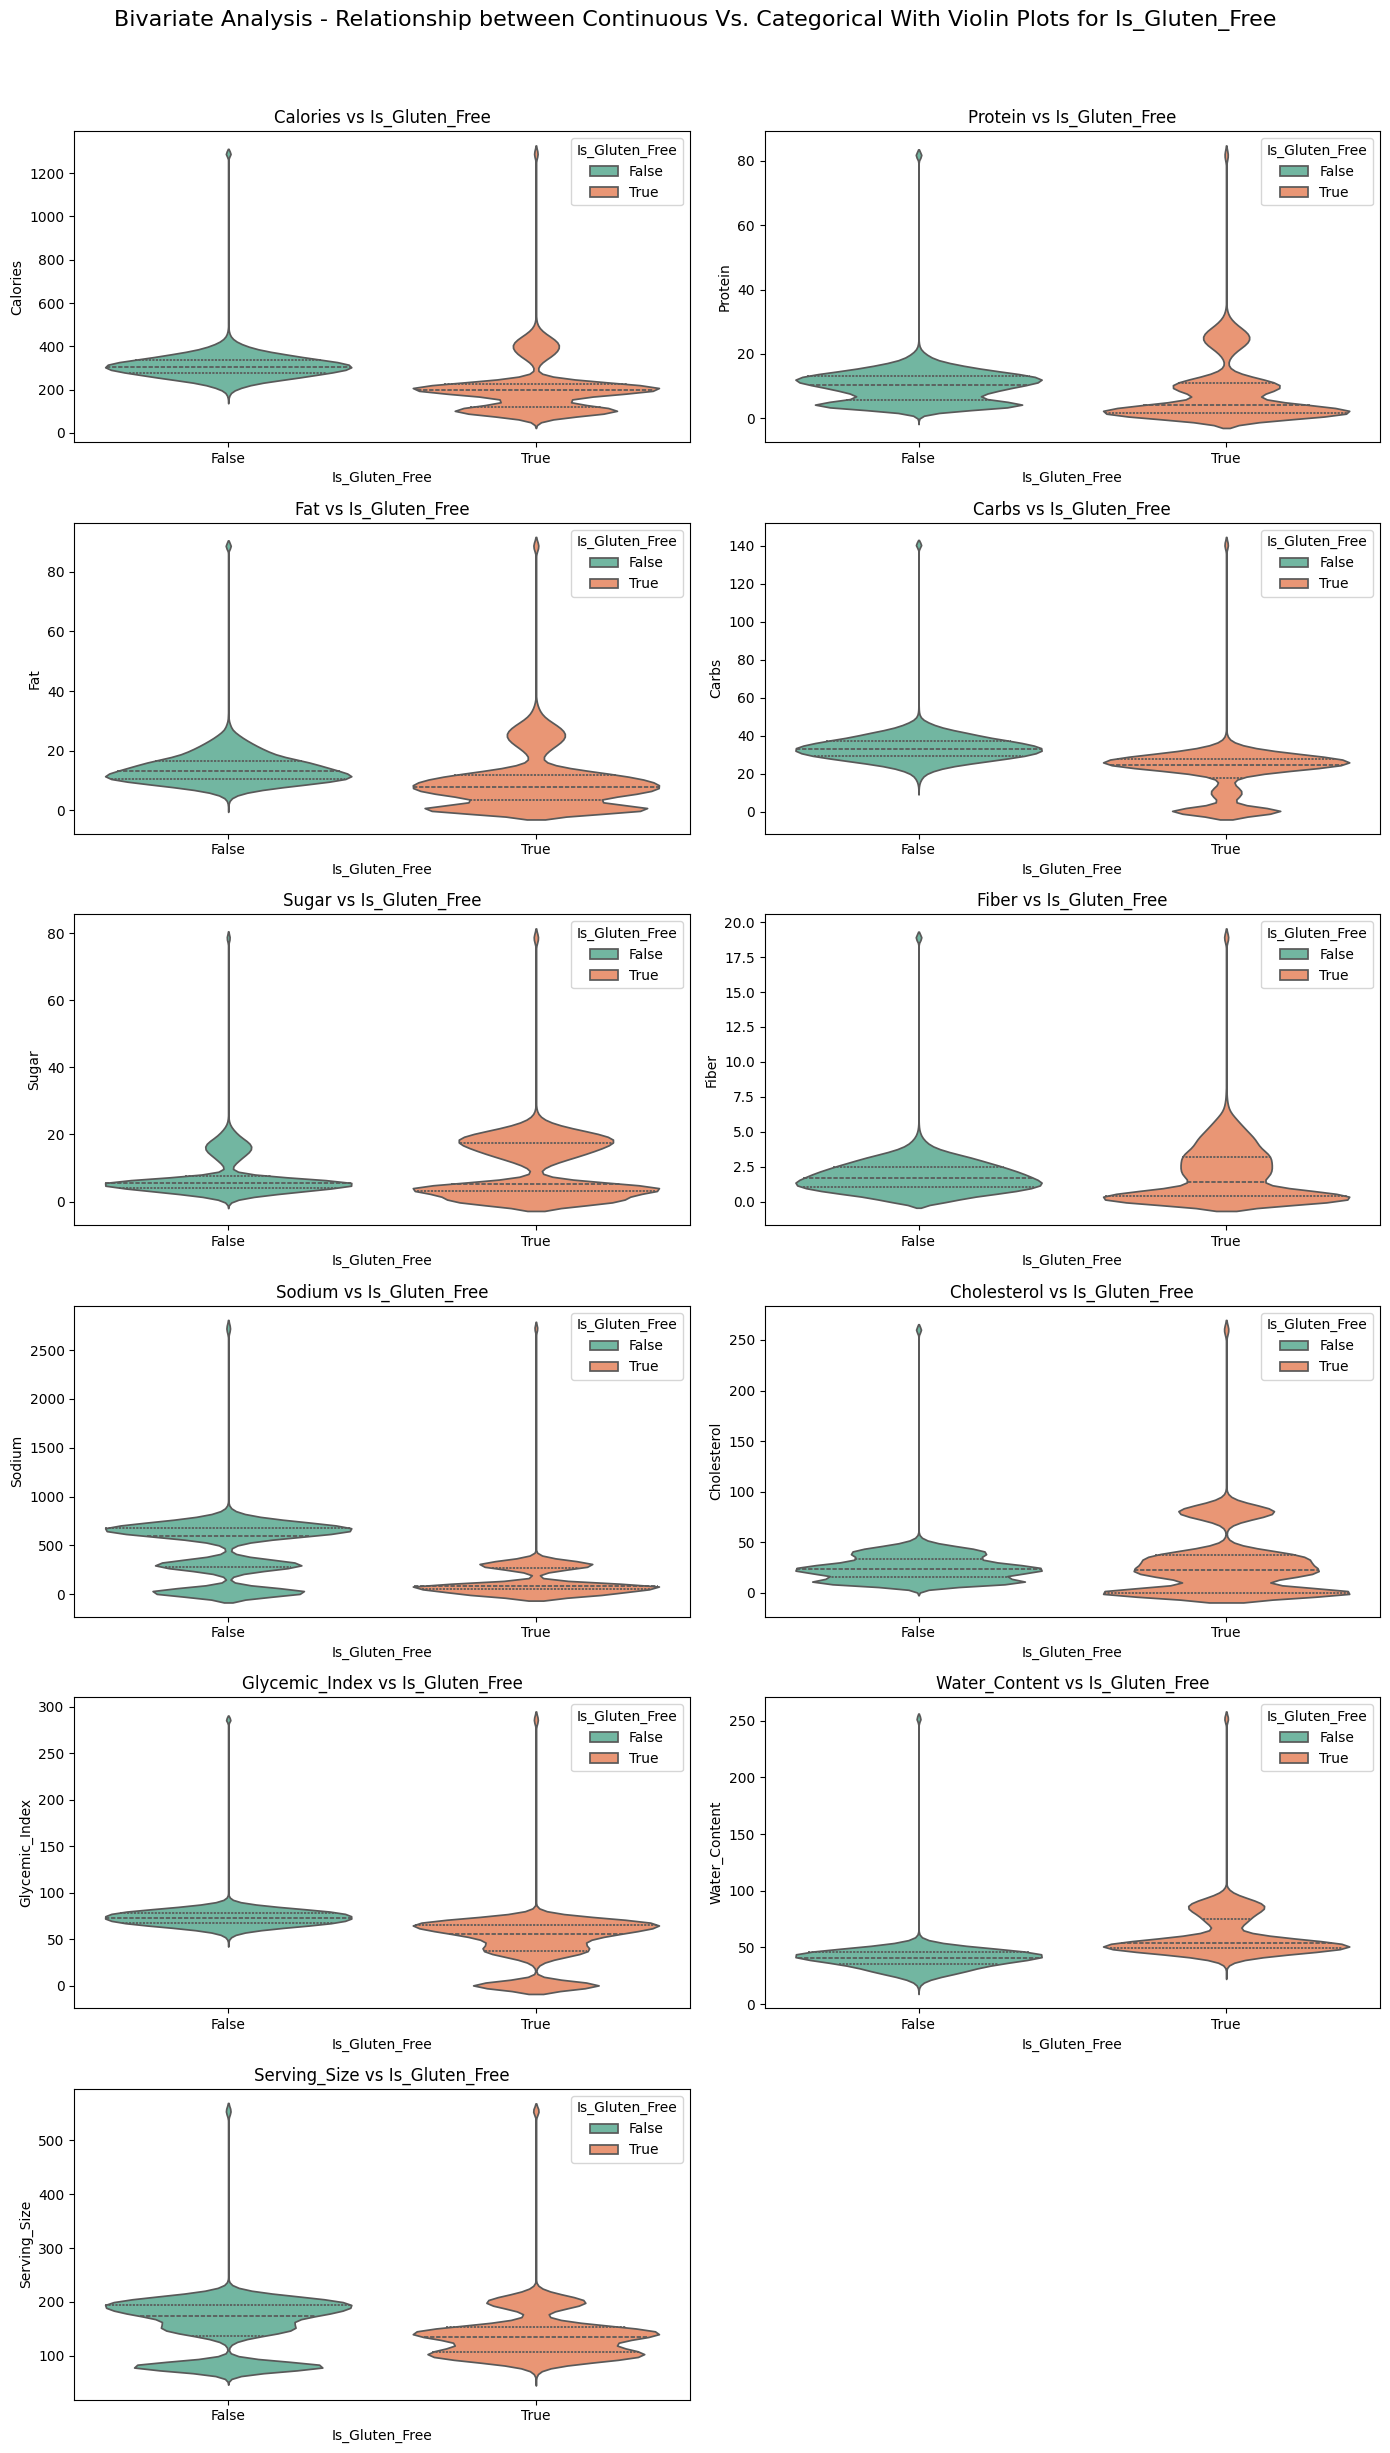

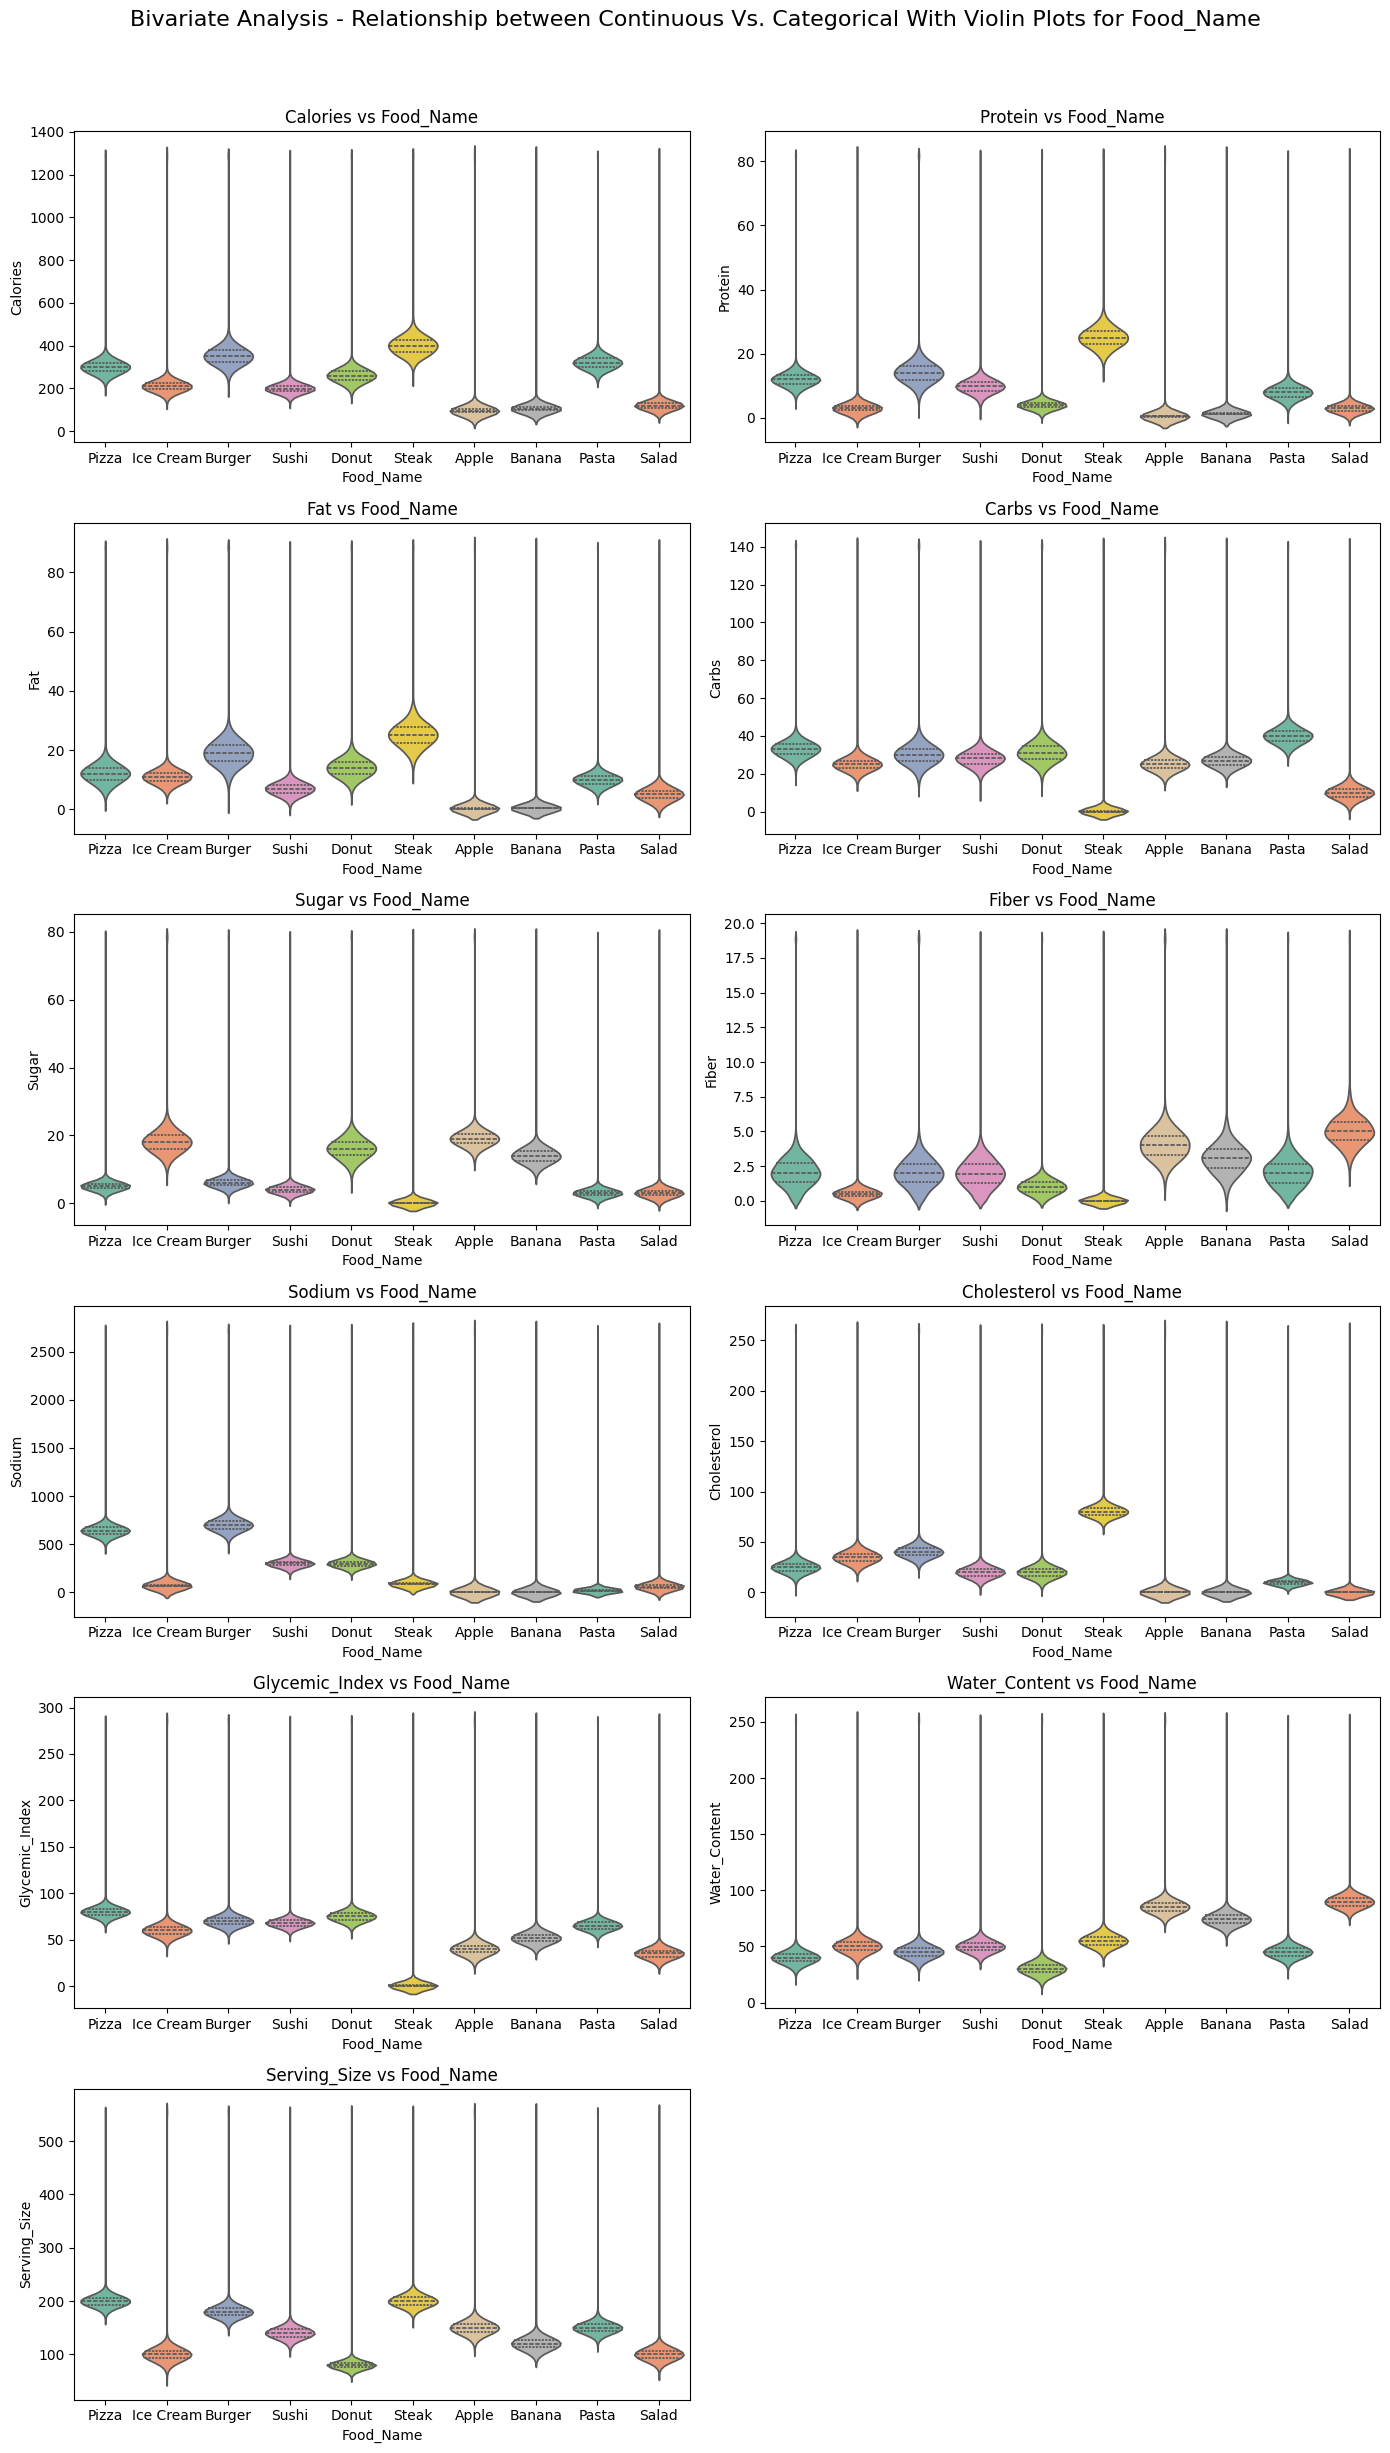

In [9]:
#Violin Plot for categorical columns
for cat in cat_cols:
    # Define grid size (adjust cols as needed)
    n_cols = 2
    n_rows = (len(cont_cols) + 1) // n_cols  # ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
    fig.suptitle(f'Bivariate Analysis - Relationship between Continuous Vs. Categorical With Violin Plots for {cat}', fontsize=16, y=1.02)
    
    axes = axes.flatten()

    for i, cont in enumerate(cont_cols):
        sns.violinplot(x=cat, y=cont, hue=cat, data=Nutri_data, ax=axes[i], palette='Set2', inner='quartile')
        axes[i].set_title(f'{cont} vs {cat}')
        axes[i].set_xlabel(cat)
        axes[i].set_ylabel(cont)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


**4. Data Exploration & EDA Process**

**4a. Checking For Null and Duplicate values**

In [10]:

print("Missing records before Imputation:",Nutri_data.isnull().sum())
print("% of missing records before Imputation:",Nutri_data.isnull().sum()*100/len(Nutri_data))
print("Result of duplicates in my data:",Nutri_data.duplicated().sum())


Missing records before Imputation: Calories              375
Protein               375
Fat                   375
Carbs                 375
Sugar                 375
Fiber                 375
Sodium                375
Cholesterol           375
Glycemic_Index        375
Water_Content         375
Serving_Size          375
Meal_Type               0
Preparation_Method      0
Is_Vegan                0
Is_Gluten_Free          0
Food_Name               0
dtype: int64
% of missing records before Imputation: Calories              1.182965
Protein               1.182965
Fat                   1.182965
Carbs                 1.182965
Sugar                 1.182965
Fiber                 1.182965
Sodium                1.182965
Cholesterol           1.182965
Glycemic_Index        1.182965
Water_Content         1.182965
Serving_Size          1.182965
Meal_Type             0.000000
Preparation_Method    0.000000
Is_Vegan              0.000000
Is_Gluten_Free        0.000000
Food_Name             0.000000


**4b. Null Imputation & Duplicates Handling**

*Since all the numerical features with null values are roughly normal distributed and have outliers, I prefer Median Imputation as it is more robust to outliers.* 

In [11]:
Nutri_data_copy = Nutri_data.copy
sel_null_col = Nutri_data.select_dtypes(include='number').columns
Nutri_data[sel_null_col] = Nutri_data[sel_null_col].apply(lambda col: col.fillna(col.median()))
Nutri_data.isnull().sum()

Calories              0
Protein               0
Fat                   0
Carbs                 0
Sugar                 0
Fiber                 0
Sodium                0
Cholesterol           0
Glycemic_Index        0
Water_Content         0
Serving_Size          0
Meal_Type             0
Preparation_Method    0
Is_Vegan              0
Is_Gluten_Free        0
Food_Name             0
dtype: int64

*As per the domain knowledge, there are chances of same nutritional values in the dataset, however it should differ by either preparation method/meal type/food name.*
*Hence, removing all the redundant rows by keeping only the first occurrence*

In [12]:
Nutri_data.duplicated().sum()
print("No Of Records Before Removing Duplicates:" ,len(Nutri_data))

No Of Records Before Removing Duplicates: 31700


In [13]:
Nutri_data.drop_duplicates(keep='first',inplace=True)
Nutri_data.duplicated().sum()

np.int64(0)

In [14]:
print("No Of Records After Removing Duplicates:" ,len(Nutri_data))

No Of Records After Removing Duplicates: 31387


**4c. Encoding Categorical Data**



*Since all the categorical column follows nominal order, one-hot encoding is choosen to encode the categorical data in columns - Meal_Type and Preparation_Method.*

*It makes the datatype into bool values, so converted into int, makes these categorical column encoding successful.*

*Since Food_Name is a target column, label encoding is choosen and applied successfully.*

In [15]:
#One-hot Encoding For Non-Target categorical variables
enc_cols = ['Meal_Type', 'Preparation_Method']
Nutri_data = pd.get_dummies(Nutri_data,columns=enc_cols,drop_first=True)

#Label Encoding For Target categorical variable
le = LabelEncoder()
Nutri_data['Food_Name'] = le.fit_transform(Nutri_data['Food_Name'])

In [16]:
for col in Nutri_data.select_dtypes(include='bool').columns:
    Nutri_data[col] = Nutri_data[col].astype(int)
Nutri_data.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Food_Name,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,0,0,6,1,0,0,1,0,0
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,0,1,4,0,0,1,0,0,1
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,0,0,2,0,0,1,0,0,1
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,0,1,9,0,1,0,1,0,0
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,0,0,3,0,0,1,0,0,0


**4d.Outlier Treatment**

In [17]:
for col in cont_cols:
    Q1=Nutri_data[col].quantile(0.25)
    Q3=Nutri_data[col].quantile(0.75)
    IQR= Q3 - Q1
    ll = Q1 - 1.5*IQR
    ul = Q3 + 1.5*IQR

    Nutri_data[col]=Nutri_data[col].apply(lambda x: ll if x<ll else ul if x>ul else x)

Nutri_data.head(5)    

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Food_Name,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,0,0,6,1,0,0,1,0,0
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,0,1,4,0,0,1,0,0,1
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,0,0,2,0,0,1,0,0,1
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,0,1,9,0,1,0,1,0,0
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,0,0,3,0,0,1,0,0,0


**4e. Feature Scaling** 

*Nutrition scores like Calories, protein etc.. have different scales. So, standard scaling is applied to all those nutritional features to make it common scaling.*

In [18]:
Cols_to_scale = Nutri_data.select_dtypes(include='float64').columns
scaler = StandardScaler()
Nutri_data[Cols_to_scale] = scaler.fit_transform(Nutri_data[Cols_to_scale])

In [19]:
Nutri_data.head()

,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Is_Vegan,Is_Gluten_Free,Food_Name,Meal_Type_dinner,Meal_Type_lunch,Meal_Type_snack,Preparation_Method_fried,Preparation_Method_grilled,Preparation_Method_raw
0,0.243520,0.836749,0.317656,0.735682,-0.531377,-0.402021,1.148336,-0.007100,1.142990,-0.092108,1.089942,0,0,6,1,0,0,1,0,0
1,-0.648228,-0.823692,-0.073232,-0.724253,1.253716,-1.276747,-0.925378,0.536603,0.274922,0.247719,-1.023919,0,1,4,0,0,1,0,0,1
2,0.704439,0.834584,1.181751,0.034357,-0.310853,-0.776398,1.204276,0.566685,-0.227055,-0.541627,1.121949,0,0,2,0,0,1,0,0,1
3,-0.814990,0.045687,-1.022364,0.351692,-0.817029,-0.086344,-0.093798,0.198478,0.214884,0.862291,-0.304975,0,1,9,0,1,0,1,0,0
4,0.060587,-0.496977,0.642501,0.067981,1.409472,-0.270756,-0.109681,-0.566907,0.337043,-1.106943,-1.718809,0,0,3,0,0,1,0,0,0


**4e. Checking The Data Distribution After Pre-processing Steps**

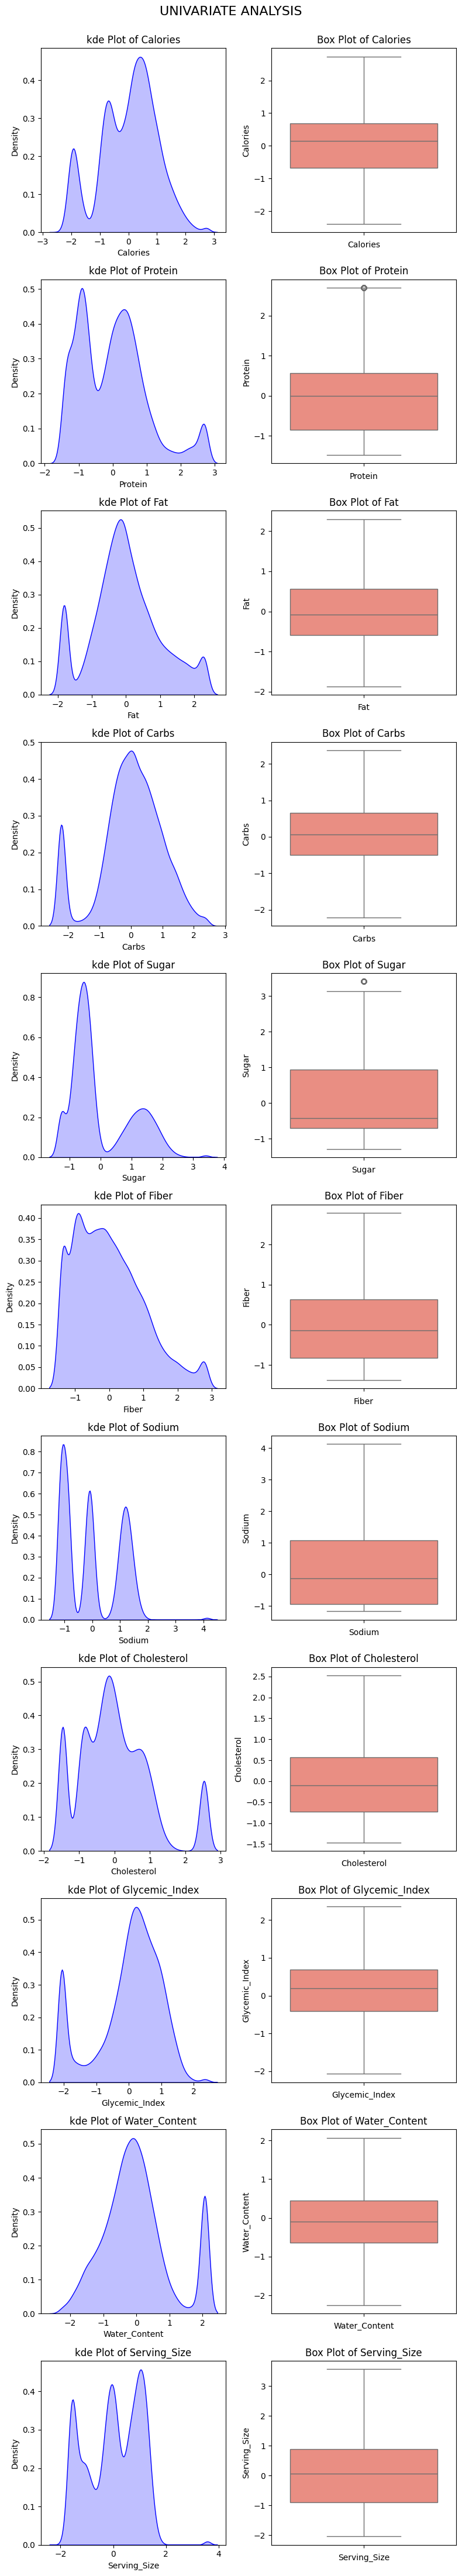

In [20]:
fig, axes = plt.subplots(nrows=len(sel_null_col),ncols=2,figsize=(8,4*len(sel_null_col)))
fig.suptitle("UNIVARIATE ANALYSIS",fontsize=16,y=1)

for i, col in enumerate(sel_null_col):
    #KDE plot - To check the data distribution - Left side
    sns.kdeplot(x=Nutri_data[col],ax=axes[i,0],color='blue',fill='True') 
    axes[i,0].set_title(f'kde Plot of {col}')
    axes[i,0].set_xlabel(col)

    #Box plot - To check the data distribution - Left side
    sns.boxplot(y=Nutri_data[col].dropna(),ax=axes[i,1],color='salmon',orient='v') 
    axes[i,1].set_title(f'Box Plot of {col}')
    axes[i,1].set_xlabel(col)

plt.tight_layout()
plt.show()


**5. Feature Selection and It's Importance**

*Opted for Tree based ensemble model - RandomForestClassifier to do the feature selection*

<Axes: title={'center': 'Feature Importance'}>

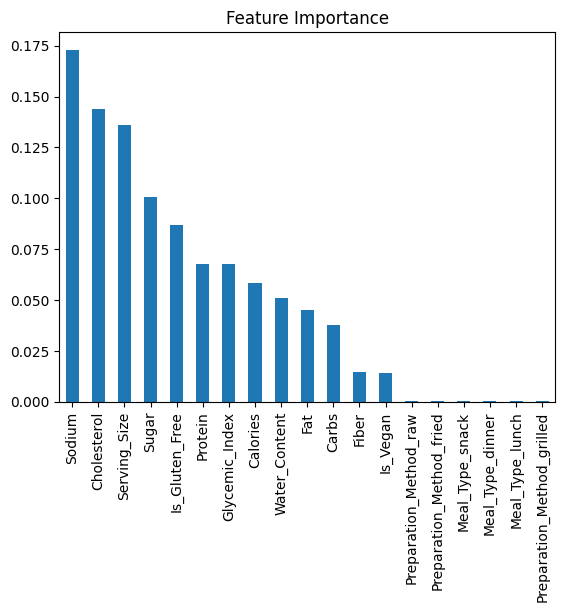

In [21]:
x = Nutri_data.drop(['Food_Name'],axis=1)
y = Nutri_data['Food_Name']
model = RandomForestClassifier()
model.fit(x,y)
importance_score = pd.Series(model.feature_importances_,index=x.columns)
importance_score.sort_values(ascending=False).plot(kind='bar',title='Feature Importance')

**6. Model Building, Training & Evaluation**

In [24]:
X = Nutri_data.drop('Food_Name', axis=1)
Y = Nutri_data['Food_Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=58),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Support Vector Machine": SVC(kernel='rbf', probability=True),
    "XGBoost": XGBClassifier(n_estimators=200,random_state=63,max_depth=4,learning_rate=0.01),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=300,random_state=33,max_depth=3,learning_rate=0.01)
}

#Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    
    # Train predictions & metrics
    y_train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    pre_train = precision_score(y_train, y_train_pred, average='weighted')
    rec_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train  = f1_score(y_train, y_train_pred, average='weighted')

    # Test predictions & metrics
    y_test_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    pre_test = precision_score(y_test, y_test_pred, average='weighted')
    rec_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test  = f1_score(y_test, y_test_pred, average='weighted')

    return {
        "Model Name" : name,
        "Accuracy [Train]": round(acc_train, 4),
        "Accuracy [Test]": round(acc_test, 4),
        "Precision [Train]": round(pre_train, 4),
        "Precision [Test]": round(pre_test, 4),
        "Recall [Train]": round(rec_train, 4),
        "Recall [Test]": round(rec_test, 4),
        "F1_Score [Train]": round(f1_train, 4),
        "F1_Score [Test]": round(f1_test, 4)
    }

result = []
report = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = evaluate_model(model, X_train, y_train, X_test, y_test)
    result.append(metrics)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
results_df = pd.DataFrame(result)
print("\n Model Evaluation Comparison:\n")
print(results_df.to_string(index=False))



 Model Evaluation Comparison:

            Model Name  Accuracy [Train]  Accuracy [Test]  Precision [Train]  Precision [Test]  Recall [Train]  Recall [Test]  F1_Score [Train]  F1_Score [Test]
   Logistic Regression            0.9923           0.9903             0.9923            0.9903          0.9923         0.9903            0.9923           0.9903
         Decision Tree            0.9967           0.9857             0.9967            0.9857          0.9967         0.9857            0.9967           0.9857
         Random Forest            0.9967           0.9911             0.9967            0.9911          0.9967         0.9911            0.9967           0.9911
   K-Nearest Neighbors            0.9928           0.9876             0.9928            0.9876          0.9928         0.9876            0.9928           0.9876
Support Vector Machine            0.9937           0.9916             0.9938            0.9916          0.9937         0.9916            0.9937           0.9916
  

**Model Performance Comparision**

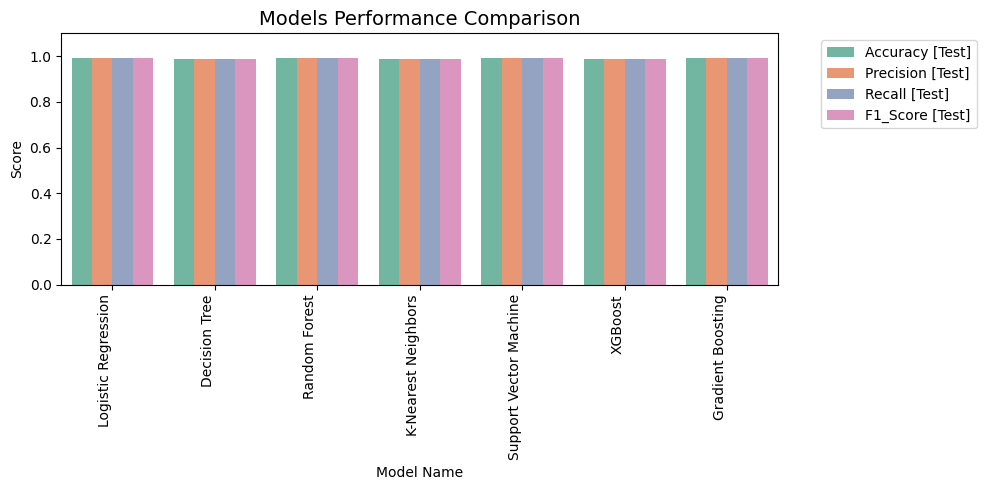

In [25]:
metrics_to_plot = ['Accuracy [Test]','Precision [Test]','Recall [Test]','F1_Score [Test]']

plot_df = results_df.melt(id_vars='Model Name', value_vars=metrics_to_plot, 
                          var_name='Metric_Type', value_name='Score')

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=plot_df, x='Model Name', y='Score', hue='Metric_Type', palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.title('Models Performance Comparison', fontsize=14)
plt.ylim(0, 1.1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()